In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
attorneysFilePath = 'data/attorneys.csv'
attorneyTimeFilePath = 'data/attorneytimeentries.csv'
categoriesFilePath = 'data/categories.csv'
clientsFilePath = 'data/clients.csv'
qPostsFilePath = 'data/questionposts.csv'
questionsFilePath = 'data/questions.csv'
statesFilePath = 'data/statesites.csv'
subCategoriesFilePath = 'data/subcategories.csv'

In [3]:
questionsDF = pd.read_csv(questionsFilePath)
questionsDF.drop(columns = ["QuestionUno", "CategoryUno", "SubcategoryUno", "AskedByClientUno", "AskedOnUtc", "TakenByAttorneyUno", "TakenOnUtc", "ClosedByAttorneyUno", "ClosedOnUtc", "LegalDeadline", "Subcategory"], inplace = True)
print(questionsDF.head())

   Id StateAbbr                      Category
0   1        NC           Family and Children
1   2        NC             Individual Rights
2   3        NC             Individual Rights
3   4        NC           Family and Children
4   5        NC  Consumer Financial Questions


In [4]:
categories = questionsDF["Category"]
frequencies = {}

for category in categories:
    if category in frequencies:
        frequencies[category] += 1
    else:
        frequencies[category] = 1

sortfreq = dict(sorted(frequencies.items(), key = lambda x: x[1], reverse = True))

for key, value in sortfreq.items():
        print("%s: %d" % (key, value))

Family and Children: 88753
Other: 37053
Housing and Homelessness: 34755
Consumer Financial Questions: 17273
Work, Employment and Unemployment: 10187
Individual Rights: 8312
Health and Disability: 2707
Income Maintenance: 2688
Education: 794
Juvenile: 357


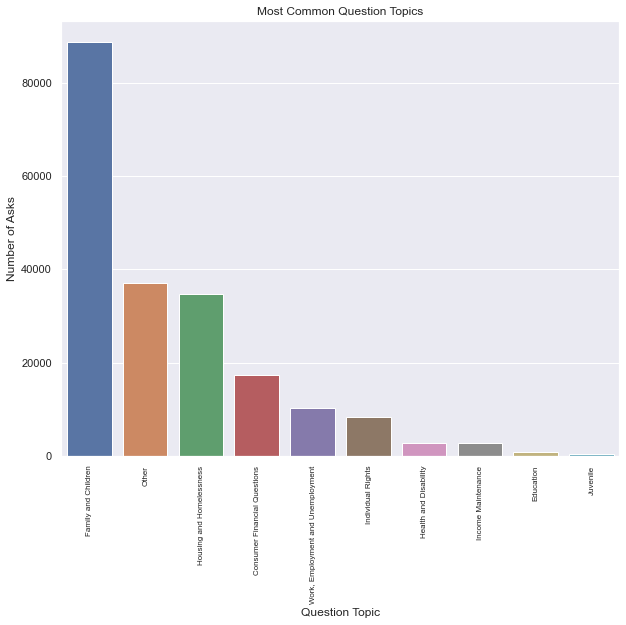

In [5]:
sns.set_theme()
keys = list(sortfreq.keys())
vals = list(sortfreq.values())

plt.figure(figsize = (10,8))
sns.barplot(x = keys, y = vals)

plt.title("Most Common Question Topics")
plt.xticks(rotation = 90, size = 8)
plt.xlabel("Question Topic")
plt.ylabel("Number of Asks")

plt.savefig('figures/commoncategories.png')